Purpose of this Scripts  
1) find FFT peaks  
2) get phase and amplitude map
3) phase and amplitude surgery
4) fix guage
5) export
   1) phase and amplitude(Fundamental)
   2) dataframe(useful sub datas)

# Load cleaned Topography

## Call from HDD

In [1]:
import numpy as np
import pandas as pd
arrSries  = pd.Series()
fns = ['2HTaSe2_bad_78K097','2HTaSe2_ap_118K002','2HTaSe2_bae_110K012','2HTaSe2_ao_115K037','test']
arr_clns = []

for fn in fns:
    arrSries[fn] = np.load(f'{fn}_cln.npy')
    arr_clns.append(arrSries[fn])

## Manually defined parameter

In [2]:
colors = ['#9467bd','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
nms = ['78K(1)', '118K', '110K', '115K','78K(2)']
Ts = [78, 118, 110, 115,78]
nano = [160,40,80,40,80]
sz = [2048,512,1024,1024,2048]
pxl20nms = [int((sz[idt] / nano[idt]) * 20) for idt in range(len(fns))]
cntrs = [np.array(arrSries[fn].shape)//2 for fn in fns]

In [3]:
resol = np.array(pxl20nms)/256

In [4]:
df = pd.DataFrame({
    'fns': fns,
    'arr_clns': arr_clns,
    'colors': colors,
    'nms': nms,
    'Ts': Ts,
    'nano': nano,
    'sz': sz
    ,'pxl20nm': pxl20nms
    ,'cntrs': cntrs
    ,'resol': resol
})
df

,fns,arr_clns,colors,nms,Ts,nano,sz,pxl20nm,cntrs,resol
0,2HTaSe2_bad_78K097,"[[1.0103092144283519e-13, -3.5913526062327836e...",#9467bd,78K(1),78,160,2048,256,"[1024, 1024]",1.0
1,2HTaSe2_ap_118K002,"[[-1.5468118784470648e-12, 1.358354867116372e-...",#1f77b4,118K,118,40,512,256,"[256, 256]",1.0
2,2HTaSe2_bae_110K012,"[[-1.399080145167011e-12, -2.5197514098938278e...",#ff7f0e,110K,110,80,1024,256,"[512, 512]",1.0
3,2HTaSe2_ao_115K037,"[[5.857832103672808e-13, 2.382601548993847e-12...",#2ca02c,115K,115,40,1024,512,"[512, 512]",2.0
4,test,"[[4.992021943206503e-12, 3.452972262860198e-12...",#d62728,78K(2),78,80,2048,512,"[1024, 1024]",2.0


# Topography

In [5]:
from useful import *
tab = subtabSr(arrSries)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


## Topography:large,tab

Text(0.5, 0.98, '2H-TaSe2 STM topography by temperature')

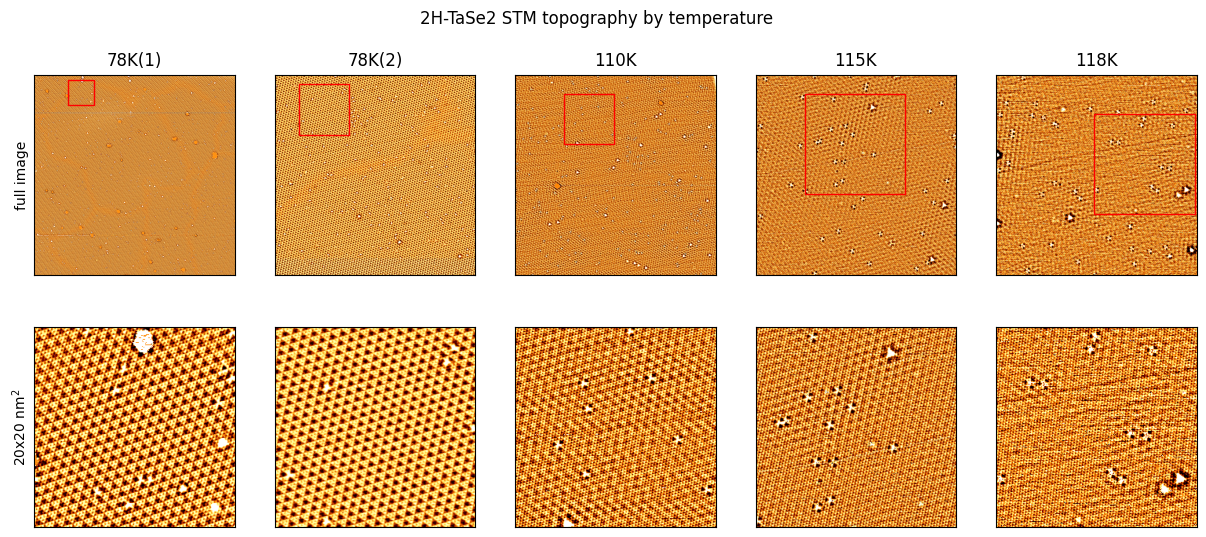

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
idts = [0,4,2,3,1]
x0, y0 = 250, 100
x0_, y0_ = 350, 50
x0s = [x0_,x0,x0,x0,x0]
y0s = [y0_,y0,y0,y0,y0]

fig,axs = plt.subplots(2,5,figsize=(15,6))
for idt,isb,x0,y0 in zip(idts,range(len(idts)),x0s,y0s):
    ax = axs[0,isb]
    plt.sca(ax)    
    arr = arrSries[fns[idt]]
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()
    ax.set_title(df['nms'][idt])
    pxl20nm = int((sz[idt]/nano[idt]) *20)
    if isb == 0:
        ax.set_ylabel('full image')
    
    ax = axs[1,isb]
    plt.sca(ax)    
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()    
    ax.set_xlim(x0,pxl20nm+x0)
    ax.set_ylim(pxl20nm+y0,y0)
    # ax.
    if isb == 0:
        ax.set_ylabel('20x20 nm$^2$')
from matplotlib.patches import Rectangle
for idt, isb, x0, y0 in zip(idts, range(len(idts)), x0s, y0s):
    ax = axs[0, isb]
    pxl20nm = int((sz[idt] / nano[idt]) * 20)
    rect = Rectangle((x0, y0), pxl20nm, pxl20nm, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.suptitle('2H-TaSe2 STM topography by temperature')


# FFT

## manual define peak

### fcns

In [7]:
import imagingPhase.ffts as imfft

imagingPhase package loaded


In [8]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0#0.0000000001 # @param
choose = [0] # @param

In [9]:
chooses = [
    [7,8,11],
    [1,4,3],
    [1,4,7],
    [1,2,5],
    [7,2,5]
]

In [10]:
%matplotlib inline
arrsz =[]
ffts = []
pk_chooses = []
for fn,choose in zip(fns,chooses):
    arr_cln = arrSries[fn]
    arrsz.append(arr_cln.shape)
    fft2abs = imfft.fft2show(arr_cln,vmin,vmax)
    pk_choose,pk_all = imfft.fft2pkfnd(fft2abs,threshold,choose)
    pk_chooses.append(pk_choose)
    ffts.append(plt.gcf()) 
    plt.close()
        

[[1138 1547]
 [ 494  847]
 [1450  679]]
3
[[274 398]
 [111 208]
 [382 162]]
3
[[559 793]
 [216 417]
 [763 327]]
3
[[543 654]
 [363 464]
 [630 418]]
3
[[1076 1282]
 [ 747  937]
 [1249  854]]
3


In [11]:
df['k123'] = pk_chooses

In [12]:
df

,fns,arr_clns,colors,nms,Ts,nano,sz,pxl20nm,cntrs,resol,k123
0,2HTaSe2_bad_78K097,"[[1.0103092144283519e-13, -3.5913526062327836e...",#9467bd,78K(1),78,160,2048,256,"[1024, 1024]",1.0,"[[114.0, 523.0], [-530.0, -177.0], [426.0, -34..."
1,2HTaSe2_ap_118K002,"[[-1.5468118784470648e-12, 1.358354867116372e-...",#1f77b4,118K,118,40,512,256,"[256, 256]",1.0,"[[18.0, 142.0], [-145.0, -48.0], [126.0, -94.0]]"
2,2HTaSe2_bae_110K012,"[[-1.399080145167011e-12, -2.5197514098938278e...",#ff7f0e,110K,110,80,1024,256,"[512, 512]",1.0,"[[47.0, 281.0], [-296.0, -95.0], [251.0, -185.0]]"
3,2HTaSe2_ao_115K037,"[[5.857832103672808e-13, 2.382601548993847e-12...",#2ca02c,115K,115,40,1024,512,"[512, 512]",2.0,"[[31.0, 142.0], [-149.0, -48.0], [118.0, -94.0]]"
4,test,"[[4.992021943206503e-12, 3.452972262860198e-12...",#d62728,78K(2),78,80,2048,512,"[1024, 1024]",2.0,"[[52.0, 258.0], [-277.0, -87.0], [225.0, -170.0]]"


# get phase and amplitude

In [13]:
import imagingPhase.get_phimap as gpm
fns  

['2HTaSe2_bad_78K097',
 '2HTaSe2_ap_118K002',
 '2HTaSe2_bae_110K012',
 '2HTaSe2_ao_115K037',
 'test']

## phase

In [14]:
sigs = [5,5,5,10,10]
angle_restoress = []
for idt,sig in zip(range(len(fns)),sigs):
    arr = arrSries[fns[idt]]
    pk_choose = pk_chooses[idt]
    ks_Latt = pk_choose[:3]
    angle_restores = gpm.phi2Hrecover(arr, pk_choose, sig)
    angle_restoress.append(angle_restores)
    print(f'finished {idt}')

finished 0
finished 1
finished 2
finished 3
finished 4


## amplitude

In [15]:
xprodss = []
ampss = []
for idt in range(len(fns)):
    arr = arrSries[fns[idt]]
    xprods = []
    amps = []
    for ik in range(3):        
        k = pk_chooses[idt][ik]
        xprod = gpm.kdisplacementmap(arr,k,.1)
        amp = np.abs(xprod)
        xprods.append(xprod)
    xprodss.append(xprods)
    ampss.append(ampss)

In [16]:
pa = [angle_restoress ,ampss]

# Surgery

In [20]:
# who's patient
fns
ipatients = [0,4]
affecteds = [396,1875]
xlimylims = [((350,800),(250,600)),
             ((100,2000),(1600,2000))]
ipatient = [0,4]



## remove step

In [21]:
# find affected
import imagingPhase.surgery as sgr
ipas = [0,0]
of2s = [0,1]

# ipa = 0
for kof3 in range(3):
    for of2,ipa  in zip(of2s,ipas):
        idt = ipatient[of2]
        affected = affecteds[of2]
        sField = pa[ipa][idt][kof3]
        if ipa == 1:
            sField = np.abs(sField)
        foo = sgr.stepRecover(sField)
        foo.x_lims = xlimylims[of2][0] #(350,800)
        foo.y_lims = xlimylims[of2][1]#(250,600)
        foo.y_affected = affected
        foo.fit()
        pa[ipa][idt][kof3] = foo.arr_flat

# f,axs = foo.imshow()

fitted
(350,)
fitted
(400,)
fitted
(350,)
fitted
(400,)
fitted
(350,)
fitted
(400,)


d:\github\2H_TaSe2_Tc_STM\imagingPhase\surgery.py:17: RuntimeWarning: overflow encountered in exp
  return A + (L - A) / (1 + np.exp(-k * (x - x0)))


## Local gaussian

In [22]:
import numpy as np
from scipy.ndimage import gaussian_filter

def localized_gaussian_blur(img, axis="x", line_pos=100, band_width=20, sigma_blur=3, sigma_mask=10):
    """
    국소적으로 Gaussian blur 적용 함수
    
    Parameters
    ----------
    img : 2D numpy array
        입력 이미지
    axis : str, "x" or "y"
        선 방향 (x=수직선, y=수평선)
    line_pos : int
        선 위치 (픽셀 단위)
    band_width : int
        선 주변에 blur 적용할 band 반폭
    sigma_blur : float
        blur 강도 (Gaussian filter sigma)
    sigma_mask : float
        soft mask feathering 정도 (sigma)
    
    Returns
    -------
    result : 2D numpy array
        국소 blur 처리된 이미지
    """
    
    mask = np.zeros_like(img)
    
    if axis == "x":  # 수직선 기준
        mask[:, max(0, line_pos-band_width):min(img.shape[1], line_pos+band_width)] = 1
    elif axis == "y":  # 수평선 기준
        mask[max(0, line_pos-band_width):min(img.shape[0], line_pos+band_width), :] = 1
    else:
        raise ValueError("axis must be 'x' or 'y'")
    
    # soft mask 만들기
    soft_mask = gaussian_filter(mask.astype(float), sigma=sigma_mask)
    soft_mask /= soft_mask.max()  # 0~1 정규화
    
    # blur 처리
    img_blur = gaussian_filter(img, sigma=sigma_blur)
    
    # blending
    result = soft_mask * img_blur + (1 - soft_mask) * img
    
    return result


# Guage Fixer

In [78]:
fns
idtfcs = [0,4,2]
pfcss =((798,1131),(460,1518),(734,897))
nm2s = df.iloc[idtfcs]['pxl20nm'].to_numpy()/10
nm2s = nm2s.astype(int)

# ind = 0
for ind in range(3):
    idt = idtfcs[ind]
    pfcs = pfcss[ind]
    nm2 = nm2s[ind]
    for ik in range(3):
        sField = pa[0][idt][ik]
        currentGuage = sField[pfcs[1]-nm2 :pfcs[1]+nm2, pfcs[0]-nm2 :pfcs[0]+nm2].mean()
        sField = sField - currentGuage
        pa[0][idt][ik] = sField


In [79]:
nm2s.astype(int)

array([25, 51, 25])

# Export

In [89]:
import pickle
with open('pa.pkl','wb') as f:
    pickle.dump(pa,f)

# Visulization

In [80]:
figs = pd.Series()

In [81]:
fid = 'phase_unwrap_gray' 
stn = 'Phase maps of 2H-TaSe2 STM topography by temperature (ver 2: gray wrap)'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        angle_restore = angle_restoress[idt][ik]
        plt.imshow(angle_restore,cmap='gray')
        tickoff()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)
plt.close()
figs[fid] = fig

In [82]:
fid = 'phase_wrap_hsv'
stn = 'Phase maps of 2H-TaSe2 STM topography by temperature (ver 1: hsv wrap)'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        angle_restore = angle_restoress[idt][ik]
        plt.imshow(gpm.wrap_phase(angle_restore),cmap='hsv')
        tickoff()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)
# 
figs[fid] = fig


# fig = figs[2]
im = gci()
cbar_ax = fig.add_axes([0.8, 0.95, 0.1, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal')

ticks = [-np.pi, 0, np.pi]
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)


plt.close()
# fig


In [83]:
fid = 'phase_wrap_twilight'
stn = 'Phase maps of 2H-TaSe2 STM topography by temperature (ver 1: twilight wrap)'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        angle_restore = angle_restoress[idt][ik]
        plt.imshow(gpm.wrap_phase(angle_restore),cmap='twilight')
        tickoff()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)



im = gci()
cbar_ax = fig.add_axes([0.8, 0.95, 0.1, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal')

ticks = [-np.pi, 0, np.pi]
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)


# plt.close()
figs[fid] = fig

In [84]:
fid = 'Amplitude_hot'
stn = 'Amplitude maps of 2H-TaSe2 STM topography by temperature'
fig,axs = plt.subplots(3,len(fns),figsize=(15,9))
for idt,isb in zip(idts , range(len(fns))):
    for ik in range(3):
        plt.sca(axs[ik,isb])
        amp = np.abs(xprodss[idt][ik])
        plt.imshow(amp,cmap='afmhot')
        tickoff()
        auto199()
        if ik == 0:
            axs[ik,isb].set_title(nms[idt])
plt.suptitle(stn)



im = gci()
cbar_ax = fig.add_axes([0.8, 0.95, 0.1, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal')

# ticks = [-np.pi, 0, np.pi]
# tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)


plt.close()
figs[fid] = fig

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [85]:
# subtabs(figs.to_list(),list(figs.index))
import importlib
subtabFigSr(figs)

C:\Users\user\AppData\Local\Temp\ipykernel_31720\3681829473.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  figs[2]


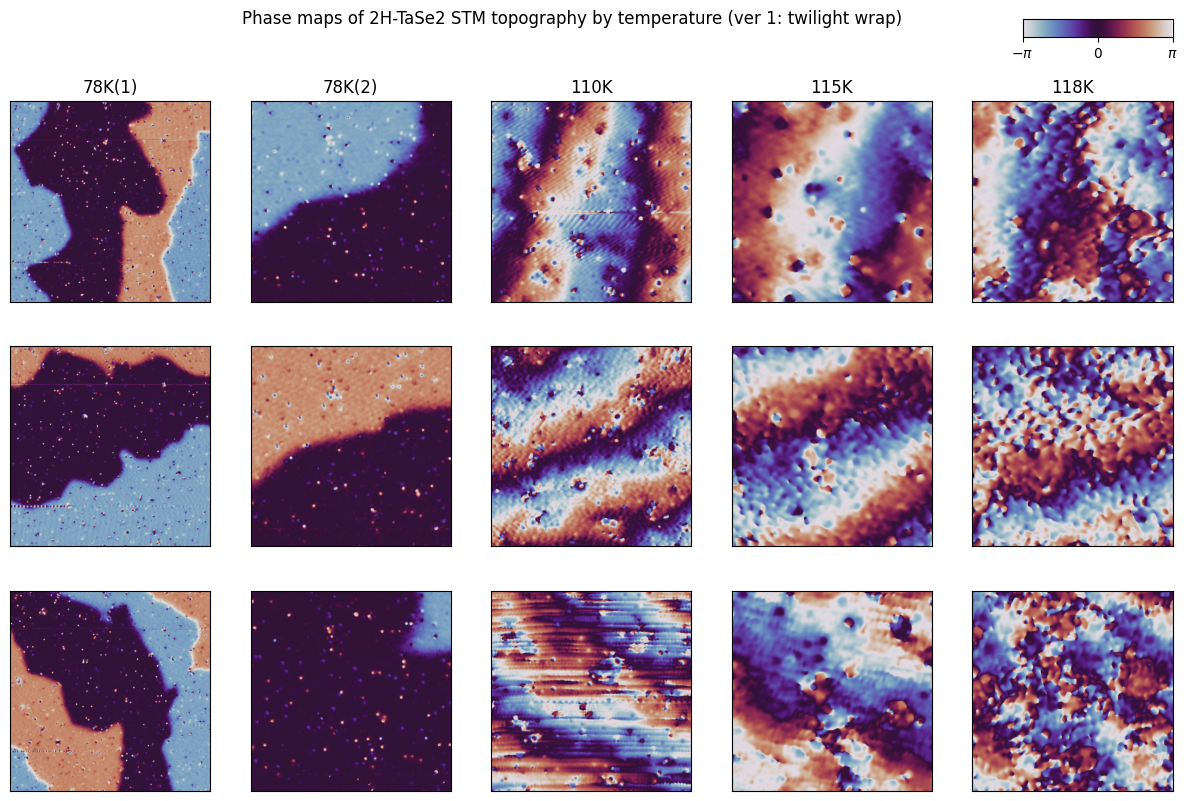

In [86]:
figs[2]

In [87]:
%matplotlib qt
fig = plt.figure(figsize=(20,20))
plt.imshow(arrSries[4],cmap='afmhot')
auto199()

C:\Users\user\AppData\Local\Temp\ipykernel_31720\908224573.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.imshow(arrSries[4],cmap='afmhot')
d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
